# Pylops - LSQR

### Author: M.Ravasi

In this notebook I compare scipy and pylops LSQR

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from scipy.sparse.linalg import lsqr as sp_lsqr
from pylops.basicoperators import *
from pylops.optimization.solver import lsqr, cgls

 
LSQR            Least-squares solution of  Ax = b
The matrix A has 50 rows and 50 columns
damp = 1.00000000000000e-10   calc_var =        0
atol = 1.00e-10                 conlim = 1.00e+12
btol = 1.00e-10               iter_lim =       50
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   5.377e+01  5.377e+01    1.0e+00  1.8e-01
     1  7.06452e-01   2.024e+01  2.024e+01    3.8e-01  7.7e-01   1.1e+01  1.0e+00
     2  5.36587e-01   1.239e+01  1.239e+01    2.3e-01  3.8e-01   1.5e+01  2.1e+00
     3  7.79517e-01   7.711e+00  7.711e+00    1.4e-01  3.1e-01   1.8e+01  3.5e+00
     4  8.14579e-01   5.684e+00  5.684e+00    1.1e-01  2.7e-01   2.0e+01  4.9e+00
     5  7.66140e-01   4.483e+00  4.483e+00    8.3e-02  1.8e-01   2.2e+01  6.5e+00
     6  7.46682e-01   3.805e+00  3.805e+00    7.1e-02  1.3e-01   2.4e+01  8.1e+00
     7  7.47093e-01   3.378e+00  3.378e+00    6.3e-02  1.3e-01   2.6e+01  9.9e+00
     8  7.48014e-01   2.930e+00  2.930

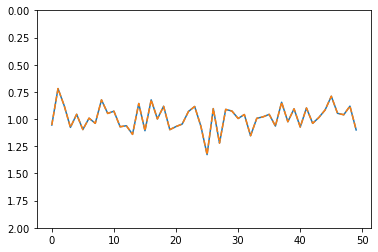

In [2]:
par = {'n': 50, 'm': 50, 'k': 14,
        'dtype': np.float64, 'sparse': False} # square

# Create random m-by-n encoding matrix
m = par['m']
n = par['n']
A = np.random.normal(0, 1, (m, n))
Aop = MatrixMult(A)
x = np.ones(n)
y = A.dot(x)

damp = 1e-10
atol = 1e-10
btol = 1e-10
conlim = 1e12
itn_max = 50
show = True

# Without initial guess
xinv_sp, istop_sp, itn_sp, r1norm_sp, r2norm_sp, anorm_sp, \
acond_sp, arnorm_sp, xnorm_sp, var_sp = \
    sp_lsqr(Aop, y, damp, atol, btol, conlim, itn_max, show)

xinv, istop, itn, r1norm, r2norm, anorm, acond, arnorm, xnorm, var = \
    lsqr(Aop, y, np.zeros(n), damp, atol, btol, conlim, itn_max, True, show)

plt.figure()
plt.plot(xinv)
plt.plot(xinv_sp, '--')
plt.ylim(2, 0);

 
LSQR            Least-squares solution of  Ax = b
The matrix A has 50 rows and 50 columns
damp = 1.00000000000000e-10   calc_var =        0
atol = 1.00e-10                 conlim = 1.00e+12
btol = 1.00e-10               iter_lim =      100
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0 -9.36353e-01   7.034e+01  7.034e+01    1.0e+00  1.3e-01
     1  2.92179e-01   3.168e+01  3.168e+01    6.4e-01  7.5e-01   1.0e+01  1.0e+00
     2  5.90425e-02   1.935e+01  1.935e+01    3.9e-01  3.7e-01   1.4e+01  2.2e+00
     3  1.27420e-01   1.410e+01  1.410e+01    2.8e-01  3.4e-01   1.7e+01  3.5e+00
     4  3.46977e-01   9.421e+00  9.421e+00    1.9e-01  3.1e-01   2.0e+01  5.2e+00
     5  5.34943e-01   6.753e+00  6.753e+00    1.4e-01  2.5e-01   2.2e+01  6.8e+00
     6  7.09822e-01   4.851e+00  4.851e+00    9.8e-02  1.8e-01   2.4e+01  8.5e+00
     7  7.34662e-01   4.106e+00  4.106e+00    8.3e-02  1.5e-01   2.6e+01  1.0e+01
     8  7.22968e-01   3.351e+00  3.351

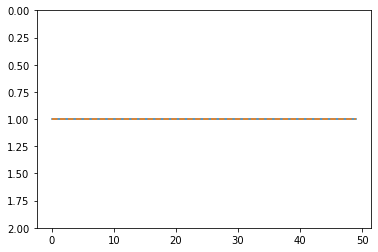

In [12]:
par = {'n': 50, 'm': 50, 'k': 14,
        'dtype': np.float64, 'sparse': False} # square

# Create random m-by-n encoding matrix
m = par['m']
n = par['n']
A = np.random.normal(0, 1, (m, n))
Aop = MatrixMult(A)
x = np.ones(n)
y = A.dot(x)

damp = 1e-10
atol = 1e-10
btol = 1e-10
conlim = 1e12
itn_max = 100
show = True

x0 = np.random.normal(0, 1, n)

# With initial guess
xinv_sp, istop_sp, itn_sp, r1norm_sp, r2norm_sp, anorm_sp, \
acond_sp, arnorm_sp, xnorm_sp, var_sp = \
sp_lsqr(Aop, y, damp, atol, btol, conlim, itn_max, show, x0=x0)
#    sp_lsqr(Aop, y - Aop * x0, damp, atol, btol, conlim, itn_max, show)
#xinv_sp += x0
xinv, istop, itn, r1norm, r2norm, anorm, acond, arnorm, xnorm, var = \
    lsqr(Aop, y, x0, damp, atol, btol, conlim, itn_max, True, show)

plt.figure()
plt.plot(xinv)
plt.plot(xinv_sp, '--')
plt.ylim(2, 0);

In [7]:
cgls(Aop, y, np.zeros(n), itn_max, show=True);

CGLS
-----------------------------------------------------------
The Operator Op has 50 rows and 50 cols
damp = 0.000000e+00	tol = 1.000000e-04	niter = 100
-----------------------------------------------------------
    Itn           x[0]              r1norm          r2norm
     1        -3.0098e-01         2.2671e+01      2.2671e+01
     2        -2.4196e-01         1.3604e+01      1.3604e+01
     3        -3.1601e-01         9.2420e+00      9.2420e+00
     4        -1.4992e-01         6.4799e+00      6.4799e+00
     5        -4.7499e-02         5.1742e+00      5.1742e+00
     6         5.8209e-02         3.8269e+00      3.8269e+00
     7         1.1207e-01         3.0126e+00      3.0126e+00
     8         1.1782e-01         2.5071e+00      2.5071e+00
     9         1.6014e-01         2.2196e+00      2.2196e+00
    10         2.1591e-01         1.9039e+00      1.9039e+00
    20         5.0873e-01         5.4517e-01      5.4517e-01
    30         6.6829e-01         3.0184e-01      3.01